In [420]:
import cv2
from matplotlib import pyplot as plt
import numpy as np



In [421]:
def get_max_frequency(img):
        img = np.fft.fft2(img)
        img = np.fft.fftshift(img)
        img=img.real
        max = np.amax(img, axis=(0, 1))
        
        return max

In [422]:
def get_min_frequency(img):
        img = np.fft.fft2(img)
        img = np.fft.fftshift(img)
        img=img.real
        min = np.amin(img, axis=(0, 1))

        return min

In [423]:
def low_pass_filter(img, cutoff):
        img = np.fft.fft2(img)
        img = np.fft.fftshift(img)
        # get magnitude
        mag = img.real
        # get phase
        phase = np.angle(img)
        for i in range(mag[0].size):
            for j in range(mag[1].size):
                if(mag[i][j] > cutoff):
                    mag[i][j] = 0
        img = mag * np.exp(1j * phase)
        img = np.fft.ifftshift(img)
        img = np.fft.ifft2(img)
        img = np.abs(img)
        return img

In [424]:
def high_pass_filter( img, cutoff):
        img = np.fft.fft2(img)
        img = np.fft.fftshift(img)
        # get magnitude
        mag =img.real
        # get phase
        phase = np.angle(img)
        for i in range(mag[0].size):
            for j in range(mag[1].size):
                if(mag[i][j] < cutoff):
                    mag[i][j] = 0
        img = mag * np.exp(1j * phase)
        img = np.fft.ifftshift(img)
        img = np.fft.ifft2(img)
        img = np.abs(img)
        return img

In [45]:
def hypridImages(img1, img2):
        return img1+img2

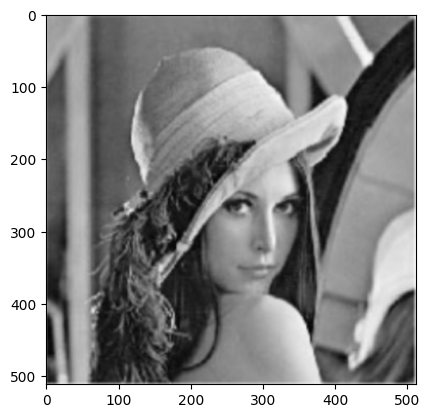

In [426]:
img = cv2.imread('../images/lena.jpg',0)
img=cv2.resize(img,(512,512))
plt.imshow(img,cmap='gray')

31392100.0
-1855414.1267850082
31392100.0


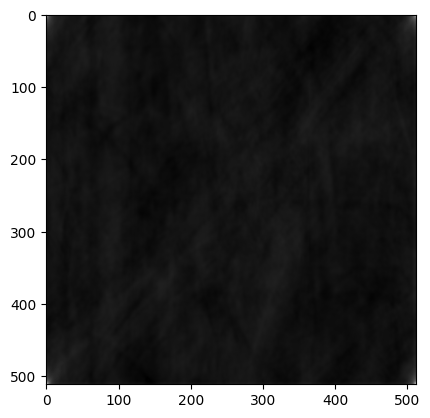

In [433]:
maxFreq=get_max_frequency(img)

minFreq=get_min_frequency(img)

print(maxFreq)
print(minFreq)

cutoff= maxFreq 
print(cutoff)

low_img=low_pass_filter(img,cutoff)
plt.imshow(low_img,cmap='gray')

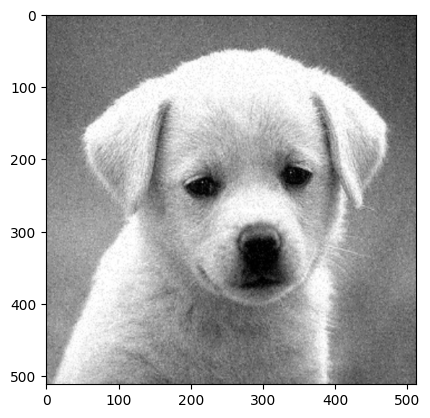

In [428]:
img2=cv2.imread('../images/02.jpeg',0)
img2=cv2.resize(img2,(512,512))
plt.imshow(img2,cmap='gray')

40677028.0
-2827498.595823371
40677028.0


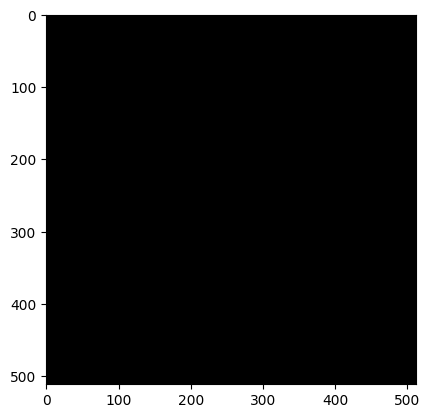

In [431]:

maxFreq2=get_max_frequency(img2)

minFreq2=get_min_frequency(img2)

print(maxFreq2)
print(minFreq2)

cutoff2= maxFreq
print(cutoff2)

high_img=high_pass_filter(img2,cutoff2)
plt.imshow(high_img,cmap='gray')

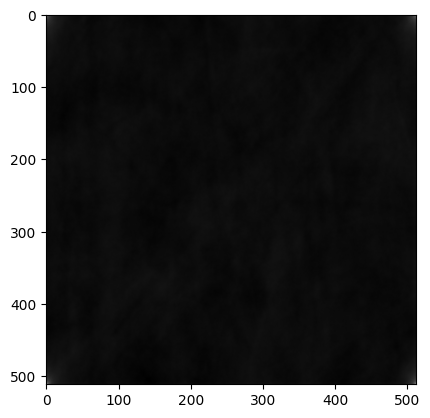

In [430]:
new_img=hypridImages(high_img,low_img)
plt.imshow(new_img,cmap='gray')

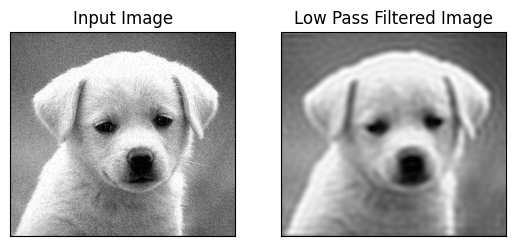

In [25]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


# 2. Load the image and convert it to grayscale:


img = cv2.imread('../images/02.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# 3. Apply the Fourier transform to the image:


f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)


# 4. Define the filter mask:


rows, cols = gray.shape
crow, ccol = rows//2, cols//2
mask = np.zeros((rows, cols), np.uint8)
r = 25

for i in range(rows):
    for j in range(cols):
        dist=np.sqrt((i-crow)**2+(j-ccol)**2)
        if dist<r:
            mask[i][j]=1


# 5. Apply the filter mask to the Fourier transformed image:


fshift = fshift * mask


# 6. Apply the inverse Fourier transform to the filtered image:


ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg)


# 7. Display the original and filtered images:


plt.subplot(121), plt.imshow(gray, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(iimg, cmap='gray')
plt.title('Low Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [38]:
def low_pass_filter(img, filter_range):
    # convert to grayscale image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # apply the Fourier transform to the image
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)

    # define the filter mask
    rows, cols = gray.shape
    crow, ccol = rows//2, cols//2
    mask = np.zeros((rows, cols), np.uint8)
    

    for i in range(rows):
        for j in range(cols):
            dist=np.sqrt((i-crow)**2+(j-ccol)**2)
            if dist<filter_range:
                mask[i][j]=1

    # apply the filter mask to the Fourier transformed image
    fshift = fshift * mask

    # apply the inverse Fourier transform to the filtered image
    ishift = np.fft.ifftshift(fshift)
    filtered_image = np.fft.ifft2(ishift)
    filtered_image = np.abs(filtered_image)

    return filtered_image


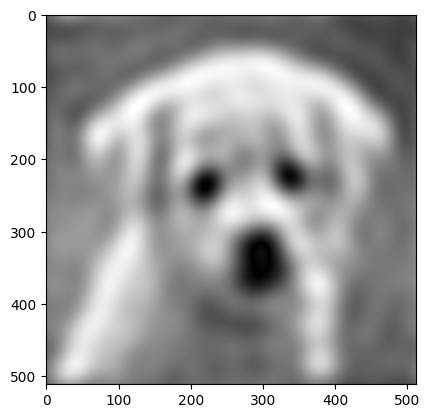

In [51]:
img = cv2.imread('../images/02.jpeg')
img=cv2.resize(img,(512,512))
filtered_image = low_pass_filter(img, 10)
plt.imshow(filtered_image, cmap='gray')

In [40]:
def high_pass_filter(img, filter_range):
    # convert to grayscale image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # apply the Fourier transform to the image
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)

    # define the filter mask
    rows, cols = gray.shape
    crow, ccol = rows//2, cols//2
    mask = np.zeros((rows, cols), np.uint8)
    

    for i in range(rows):
        for j in range(cols):
            dist=np.sqrt((i-crow)**2+(j-ccol)**2)
            if dist>filter_range:
                mask[i][j]=1

    # apply the filter mask to the Fourier transformed image
    fshift = fshift * mask

    # apply the inverse Fourier transform to the filtered image
    ishift = np.fft.ifftshift(fshift)
    filtered_image = np.fft.ifft2(ishift)
    filtered_image = np.abs(filtered_image)

    return filtered_image


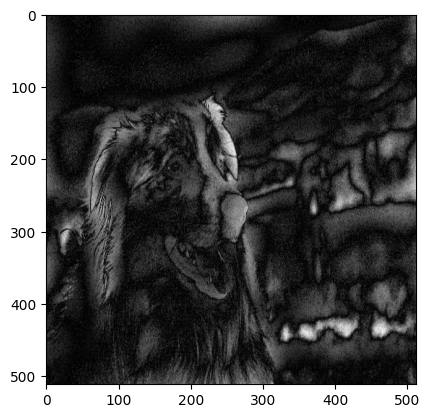

In [54]:
img = cv2.imread('../images/03.jpeg')
img=cv2.resize(img,(512,512))
filtered_image2 = high_pass_filter(img, 5)
plt.imshow(filtered_image2, cmap='gray')

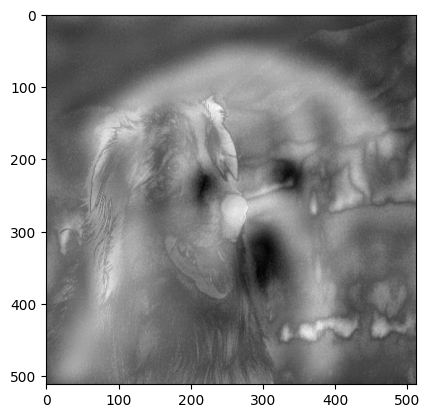

In [55]:
new_img=hypridImages(filtered_image2,filtered_image)
plt.imshow(new_img,cmap='gray')